In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)


class ANDGateNN(nn.Module):
    def __init__(self):
        super(ANDGateNN, self).__init__()
        self.layer1 = nn.Linear(2, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

model = ANDGateNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


model.eval()
with torch.no_grad():
    predictions = model(X).round()
    print(f'Predictions: {predictions.numpy().flatten()}')
    print(f'True Labels: {Y.numpy().flatten()}')


Epoch [1000/10000], Loss: 0.1397
Epoch [2000/10000], Loss: 0.0769
Epoch [3000/10000], Loss: 0.0337
Epoch [4000/10000], Loss: 0.0167
Epoch [5000/10000], Loss: 0.0099
Epoch [6000/10000], Loss: 0.0067
Epoch [7000/10000], Loss: 0.0049
Epoch [8000/10000], Loss: 0.0038
Epoch [9000/10000], Loss: 0.0031
Epoch [10000/10000], Loss: 0.0026
Predictions: [0. 0. 0. 1.]
True Labels: [0. 0. 0. 1.]


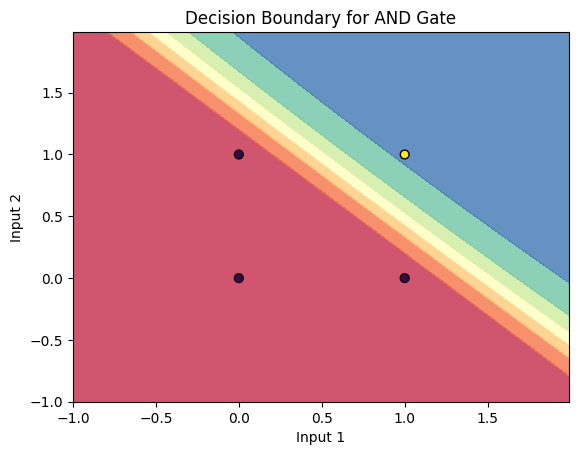

In [12]:
import numpy as np


def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = Z.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), s=40, edgecolor='k')
    plt.title("Decision Boundary for AND Gate")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()


plot_decision_boundary(model, X.numpy(), Y.numpy())


In [13]:
pip install openai

In [14]:
import re
import csv

def read_text_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def extract_topics_and_questions(text):
    # Use regular expressions to extract topics and questions
    topics_and_questions = re.findall(r'<Topic:.*?>\n(.*?)<QS:.*?>', text, re.DOTALL)
    return topics_and_questions

def generate_sales_conversations(topics_and_questions):
    conversations = []
    for topic_and_question in topics_and_questions:
        # Split the topic_and_question string based on the first occurrence of newline
        topic, question = topic_and_question.strip().split('\n', 1)
        salesman_response = f"Regarding {topic.strip()}: {question.strip()}"
        user_response = "Thank you for your information."
        conversation = {"Salesman": salesman_response, "User": user_response}
        conversations.append(conversation)
    return conversations



def write_to_csv(conversations, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Salesman', 'User']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for conversation in conversations:
            writer.writerow(conversation)

def main():
    filename = 'users_sales_conversions.txt'
    text_data = read_text_data(filename)
    topics_and_questions = extract_topics_and_questions(text_data)
    conversations = generate_sales_conversations(topics_and_questions)
    write_to_csv(conversations, 'sales_conversations.csv')

if __name__ == "__main__":
    main()
